# Taller 1 - Calentamiento

### Importante: importar librerías antes de ejecutar el código

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import RBFInterpolator

## 1. Reconocimiento

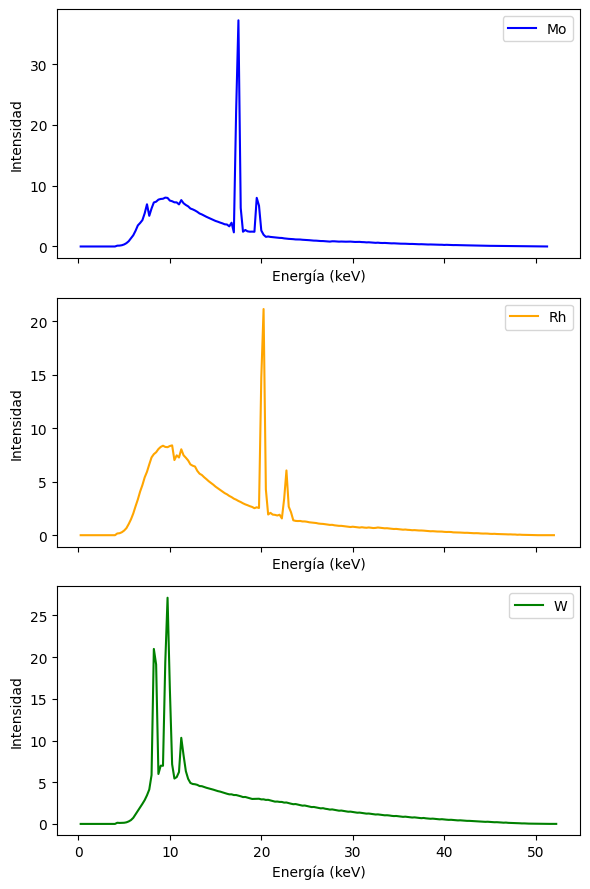

'for i in range(10, 51):\n    print(f"Mo {i}kV: {Mo_unfiltered[i][\'energy\'][:5]} {Mo_unfiltered[i][\'intensity\'][:5]}")\n    print(f"Rh {i}kV: {Rh_unfiltered[i][\'energy\'][:5]} {Rh_unfiltered[i][\'intensity\'][:5]}")\n    print(f"W {i}kV: {W_unfiltered[i][\'energy\'][:5]} {W_unfiltered[i][\'intensity\'][:5]}")\n    print("-" * 40)\n'

In [15]:
Mo_unfiltered = {}
Rh_unfiltered = {}
W_unfiltered = {}
list_of_dfs = []

for i in range(10, 51):
    Mo_unfiltered[i] = {"energy": [], "intensity": []}
    Rh_unfiltered[i] = {"energy": [], "intensity": []}
    W_unfiltered[i] = {"energy": [], "intensity": []}

    directory_Mo = "mammography_spectra/Mo_unfiltered_10kV-50kV/Mo_{}kV.dat".format(i)
    directory_Rh = "mammography_spectra/Rh_unfiltered_10kV-50kV/Rh_{}kV.dat".format(i)
    directory_W = "mammography_spectra/W_unfiltered_10kV-50kV/W_{}kV.dat".format(i)
    with open(directory_Mo, "r") as file:
        content_Mo = file.read()
        lines_Mo = content_Mo.splitlines()
    with open(directory_Rh, "r") as file:
        content_Rh = file.read()
        lines_Rh = content_Rh.splitlines()
    with open(directory_W, "r") as file:
        content_W = file.read()
        lines_W = content_W.splitlines()

    for data_Mo in lines_Mo:
        if data_Mo.startswith("#"):
            continue
        values = data_Mo.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Mo_unfiltered[i]["energy"].append(energy)
        Mo_unfiltered[i]["intensity"].append(intensity)


        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break

    for data_Rh in lines_Rh:
        if data_Rh.startswith("#"):
            continue
        values = data_Rh.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        Rh_unfiltered[i]["energy"].append(energy)
        Rh_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break

    for data_W in lines_W:
        if data_W.startswith("#"):
            continue
        values = data_W.split()
        if len(values) < 2:
            continue
        energy = float(values[0])
        intensity = float(values[1])

        W_unfiltered[i]["energy"].append(energy)
        W_unfiltered[i]["intensity"].append(intensity)

        #print(f"{energy:f} {intensity:f}")
        if energy < 0 or intensity < 0:
            print("Error: Negative values found in the data.")
            break


df_Mo = pd.DataFrame(Mo_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_Rh = pd.DataFrame(Rh_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})
df_W = pd.DataFrame(W_unfiltered).T.explode(['energy', 'intensity']).reset_index().rename(columns={'index': 'kV'})

# Save the DataFrames to CSV files
df_Mo.to_csv('Mo_spectra_data.csv', index=False)
df_Rh.to_csv('Rh_spectra_data.csv', index=False)
df_W.to_csv('W_spectra_data.csv', index=False)

mean_by_kV_Mo = df_Mo.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Mo['intensity'].mean()

#print("Mean intensity for Mo across all kV values:")
#print(mean_by_kV_Mo)
#print(f"Mean intensity for Mo: {mean}")

mean_by_kV_Rh = df_Rh.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_Rh['intensity'].mean()
#print("Mean intensity for Rh across all kV values:")
#print(mean_by_kV_Rh)
#print(f"Mean intensity for Rh: {mean}")

mean_by_kV_W = df_W.groupby('kV')['intensity'].mean().reset_index()
mean = mean_by_kV_W['intensity'].mean()
#print("Mean intensity for W across all kV values:")
#print(mean_by_kV_W)
#print(f"Mean intensity for W: {mean}")

mean_by_kV_Mo.to_csv('mean_intensity_Mo.csv', index=False)
mean_by_kV_Rh.to_csv('mean_intensity_Rh.csv', index=False)
mean_by_kV_W.to_csv('mean_intensity_W.csv', index=False)

mean_by_energy_Mo = df_Mo.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_Rh = df_Rh.groupby('energy')['intensity'].mean().reset_index()
mean_by_energy_W = df_W.groupby('energy')['intensity'].mean().reset_index() 
mean_by_energy_Mo.to_csv('mean_intensity_by_energy_Mo.csv', index=False)
mean_by_energy_Rh.to_csv('mean_intensity_by_energy_Rh.csv', index=False)
mean_by_energy_W.to_csv('mean_intensity_by_energy_W.csv', index=False)

mean_intensity_by_energy_all = pd.concat([mean_by_energy_Mo, mean_by_energy_Rh, mean_by_energy_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_intensity_by_energy_all.to_csv('mean_intensity_by_energy_all_materials.csv', index=False)  


fig, axes = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(6, 9))  # apila 3 gráficas
# Primer subplot
axes[0].plot(mean_by_energy_Mo['energy'], mean_by_energy_Mo['intensity'], label='Mo', color='blue')
axes[0].legend(loc='upper right')
axes[0].set_ylabel('Intensidad')
axes[0].set_xlabel('Energía (keV)')

# Segundo subplot
axes[1].plot(mean_by_energy_Rh['energy'], mean_by_energy_Rh['intensity'], label='Rh', color='orange')
axes[1].legend(loc='upper right')
axes[1].set_ylabel('Intensidad')
axes[1].set_xlabel('Energía (keV)')

# Tercer subplot
axes[2].plot(mean_by_energy_W['energy'], mean_by_energy_W['intensity'], label='W', color='green')
axes[2].legend(loc='upper right')
axes[2].set_ylabel('Intensidad')
axes[2].set_xlabel('Energía (keV)')

plt.tight_layout()
# Guardar en PDF ANTES de mostrar
plt.savefig("1.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()   # opcional: mostrar en pantalla después de guardar


mean_all = pd.concat([mean_by_kV_Mo, mean_by_kV_Rh, mean_by_kV_W], keys=['Mo', 'Rh', 'W'], names=['Material', 'Row']).reset_index(level='Material')
mean_all.to_csv('mean_intensity_all_materials.csv', index=False) 

       

# Print the results for verification
"""for i in range(10, 51):
    print(f"Mo {i}kV: {Mo_unfiltered[i]['energy'][:5]} {Mo_unfiltered[i]['intensity'][:5]}")
    print(f"Rh {i}kV: {Rh_unfiltered[i]['energy'][:5]} {Rh_unfiltered[i]['intensity'][:5]}")
    print(f"W {i}kV: {W_unfiltered[i]['energy'][:5]} {W_unfiltered[i]['intensity'][:5]}")
    print("-" * 40)
"""


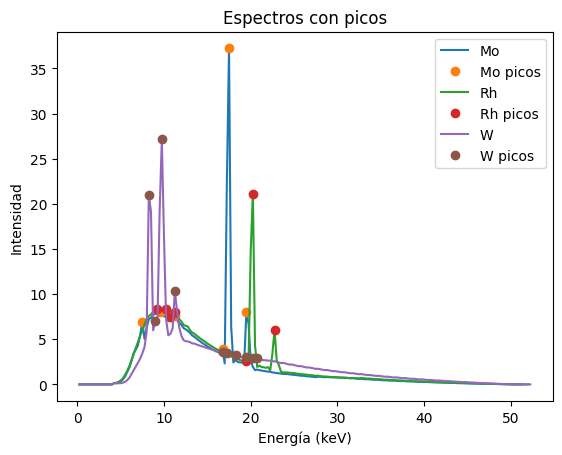

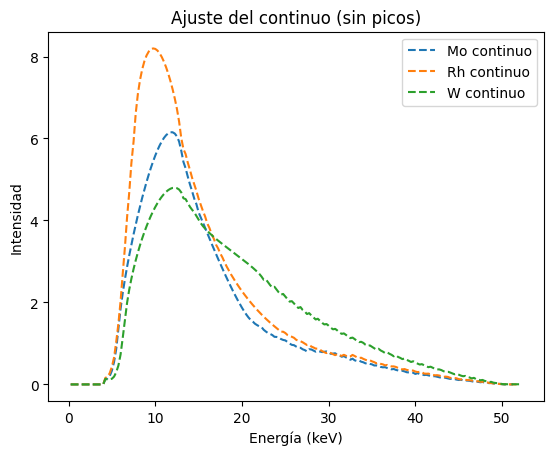

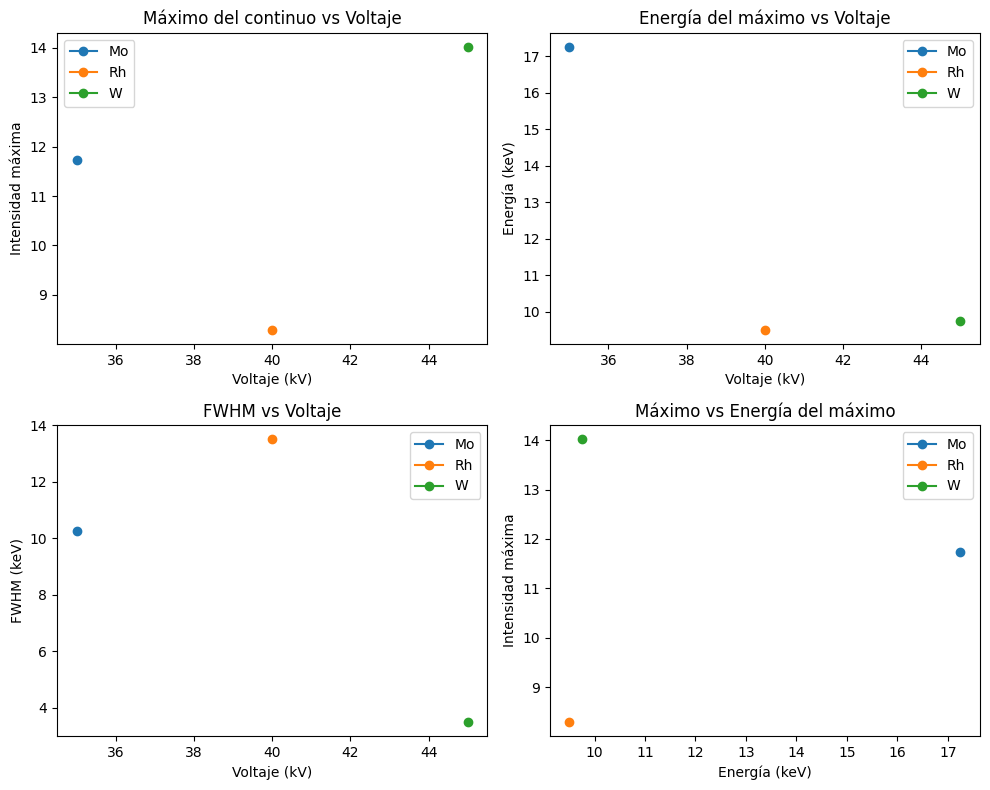

In [9]:
# ---------------------------
# FUNCIONES
# ---------------------------
def analizar_material(filename, label):
    df = pd.read_csv(filename)
    energia = df['energy'].values
    intensidad = df['intensity'].values
    peaks, _ = find_peaks(intensidad, height=np.max(intensidad) * 0.1)
    mask = np.ones(len(energia), dtype=bool)
    for p in peaks:
        start = max(0, p - 5)
        end = min(len(energia), p + 6)
        mask[start:end] = False
    energia_sin_picos = energia[mask]
    intensidad_sin_picos = intensidad[mask]
    rbf = RBFInterpolator(
        energia_sin_picos.reshape(-1, 1),
        intensidad_sin_picos,
        kernel='thin_plate_spline'
    )
    intensidad_interp = rbf(energia.reshape(-1, 1))
    return energia, intensidad, peaks, intensidad_interp

def obtener_continuo(energia, intensidad, umbral=0.05):
    intensidad = np.array(intensidad)
    energia = np.array(energia)
    mask = intensidad < (np.max(intensidad) * (1 - umbral))
    energia_filtrada = energia[mask]
    intensidad_filtrada = intensidad[mask]
    rbf = RBFInterpolator(
        energia_filtrada.reshape(-1, 1),
        intensidad_filtrada,
        neighbors=10,
        smoothing=0.5
    )
    intensidad_interp = rbf(energia.reshape(-1, 1))
    return intensidad_interp

def calcular_fwhm(energia, intensidad):
    max_val = np.max(intensidad)
    half_max = max_val / 2
    indices = np.where(intensidad >= half_max)[0]
    if len(indices) >= 2:
        fwhm = energia[indices[-1]] - energia[indices[0]]
    else:
        fwhm = np.nan
    return fwhm

# ---------------------------
# ARCHIVOS Y VOLTAJES
# ---------------------------
archivos = [
    ("mean_intensity_by_energy_Mo.csv", "Mo"),
    ("mean_intensity_by_energy_Rh.csv", "Rh"),
    ("mean_intensity_by_energy_W.csv", "W")
]

voltajes = {
    "Mo": 35,
    "Rh": 40,
    "W": 45
}

# ---------------------------
# PARTE A
# ---------------------------
plt.figure()
for filename, label in archivos:
    energia, intensidad, peaks, intensidad_interp = analizar_material(filename, label)
    plt.plot(energia, intensidad, label=f"{label}")
    plt.plot(energia[peaks], intensidad[peaks], "o", label=f"{label} picos")
plt.xlabel("Energía (keV)")
plt.ylabel("Intensidad")
plt.legend()
plt.title("Espectros con picos")
plt.savefig("2a.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

# ---------------------------
# PARTE B
# ---------------------------
plt.figure()
for filename, label in archivos:
    energia, intensidad, peaks, intensidad_interp = analizar_material(filename, label)
    plt.plot(energia, intensidad_interp, "--", label=f"{label} continuo")
plt.xlabel("Energía (keV)")
plt.ylabel("Intensidad")
plt.legend()
plt.title("Ajuste del continuo (sin picos)")
plt.savefig("2b.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

# ---------------------------
# PARTE C
# ---------------------------
resultados_max_val = {}
resultados_energia_max = {}
resultados_fwhm = {}

for archivo, label in archivos:
    df = pd.read_csv(archivo)
    energia = df["energy"].values
    intensidad = df["intensity"].values

    continuo = obtener_continuo(energia, intensidad)

    max_val = np.max(continuo)
    idx_max = np.argmax(continuo)
    energia_max = energia[idx_max]
    fwhm = calcular_fwhm(energia, continuo)

    resultados_max_val[label] = [max_val]
    resultados_energia_max[label] = [energia_max]
    resultados_fwhm[label] = [fwhm]

# Crear subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

for label in resultados_max_val:
    axs[0, 0].plot([voltajes[label]], resultados_max_val[label], 'o-', label=label)
axs[0, 0].set_title("Máximo del continuo vs Voltaje")
axs[0, 0].set_xlabel("Voltaje (kV)")
axs[0, 0].set_ylabel("Intensidad máxima")
axs[0, 0].legend()

for label in resultados_energia_max:
    axs[0, 1].plot([voltajes[label]], resultados_energia_max[label], 'o-', label=label)
axs[0, 1].set_title("Energía del máximo vs Voltaje")
axs[0, 1].set_xlabel("Voltaje (kV)")
axs[0, 1].set_ylabel("Energía (keV)")
axs[0, 1].legend()

for label in resultados_fwhm:
    axs[1, 0].plot([voltajes[label]], resultados_fwhm[label], 'o-', label=label)
axs[1, 0].set_title("FWHM vs Voltaje")
axs[1, 0].set_xlabel("Voltaje (kV)")
axs[1, 0].set_ylabel("FWHM (keV)")
axs[1, 0].legend()

for label in resultados_max_val:
    axs[1, 1].plot(resultados_energia_max[label], resultados_max_val[label], 'o-', label=label)
axs[1, 1].set_title("Máximo vs Energía del máximo")
axs[1, 1].set_xlabel("Energía (keV)")
axs[1, 1].set_ylabel("Intensidad máxima")
axs[1, 1].legend()

plt.tight_layout()
plt.savefig("2c.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()